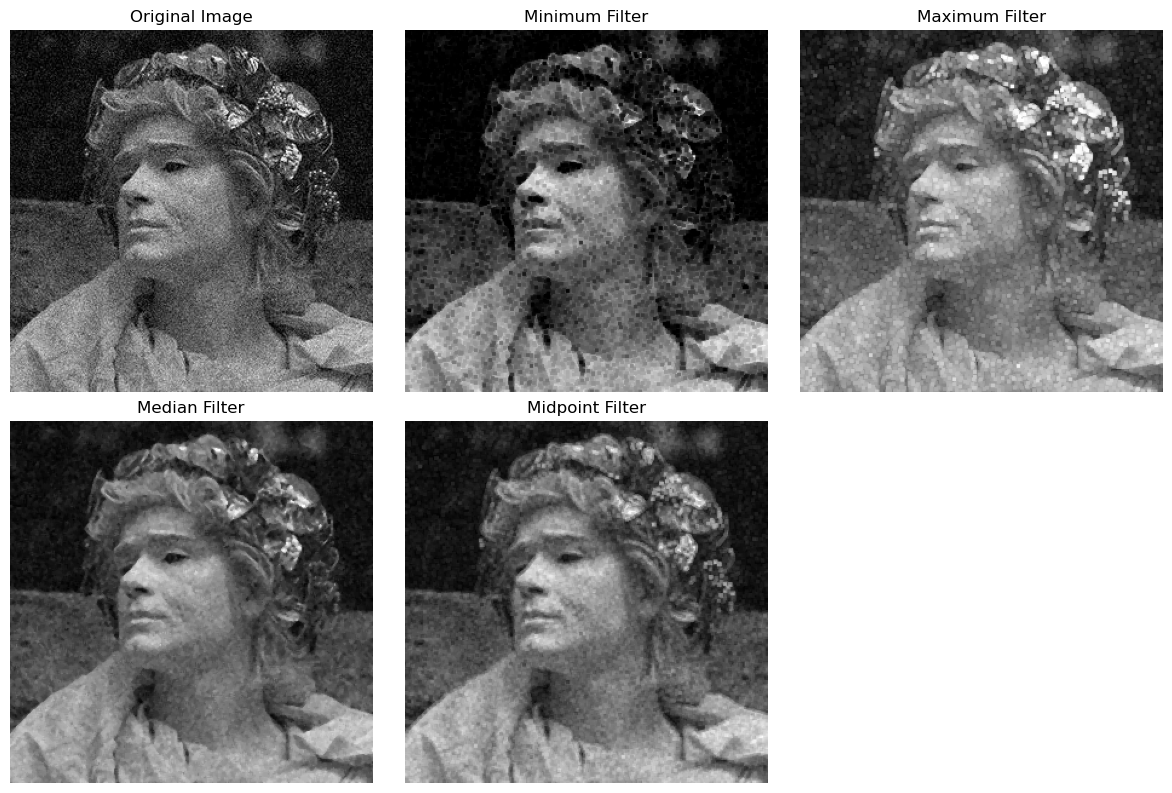

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menerapkan dan menampilkan filter
def apply_and_show_filter(image, filter_type, kernel_size=(3, 3)):
    if filter_type == 'minimum':
        filtered_image = cv2.erode(image, np.ones(kernel_size, np.uint8))
    elif filter_type == 'maximum':
        filtered_image = cv2.dilate(image, np.ones(kernel_size, np.uint8))
    elif filter_type == 'median':
        filtered_image = cv2.medianBlur(image, kernel_size[0])
    elif filter_type == 'midpoint':
        min_filtered = cv2.erode(image, np.ones(kernel_size, np.uint8))
        max_filtered = cv2.dilate(image, np.ones(kernel_size, np.uint8))
        filtered_image = (min_filtered.astype(np.uint16) + max_filtered.astype(np.uint16)) / 2
        filtered_image = filtered_image.astype(np.uint8)
    else:
        raise ValueError(f"Unknown filter type: {filter_type}")

    return filtered_image

# Membaca citra grayscale
image = cv2.imread('img3.jpg', cv2.IMREAD_GRAYSCALE)

# Ukuran kernel untuk filter (3x3)
kernel_size = (3, 3)

# List untuk menyimpan hasil dari masing-masing filter
filtered_images = {}

# Menerapkan filter dan menyimpan hasilnya
filter_types = ['minimum', 'maximum', 'median', 'midpoint']
for filter_type in filter_types:
    filtered_image = apply_and_show_filter(image, filter_type, kernel_size)
    filtered_images[filter_type] = filtered_image

# Menampilkan citra asli dan hasil filter
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Menampilkan hasil dari masing-masing filter
for i, filter_type in enumerate(filter_types):
    plt.subplot(2, 3, i + 2)
    plt.imshow(filtered_images[filter_type], cmap='gray')
    plt.title(f'{filter_type.capitalize()} Filter')
    plt.axis('off')

plt.tight_layout()
plt.show()
